# Differentiation and Integration

In [16]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import scipy as sp
from math import *
%matplotlib inline

In [2]:
def func(x):
    return np.sin(x)+1

# Trapezoidal

In [43]:
x = np.linspace(-0.5, 2.5)
x0 = np.linspace(0., 2.)

(-1, 3)

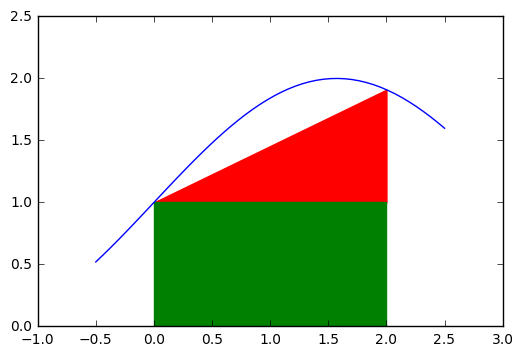

In [56]:
plt.plot(x, func(x))
plt.fill_between(x0, 1+(func(2)-1)/2*x0, y2=1, color='r')
plt.fill_between(x0, 1, color='g')
plt.ylim(0, 2.5)
plt.xlim(-1, 3)

In [61]:
def trapz(x0, h):
    x1= x0+h
    return 0.5*(x1-x0)*(func(x0) + func(x1))

In [62]:
trapz(0, 2)

2.909297426825682

In [63]:
def Simps(x0, h):
    return h/3.*(func(x0) + 4*func(x0+h)+ func(x0+2*h))

In [64]:
Simps(0, 1)

3.4250604553524227

In [78]:
#using numpy
#2*(func(2)-1)/2. + 2
np.trapz(func(x0), x0), integrate.simps(func(x0), x0), -np.cos(2)+np.cos(0)+2

(3.415950225946124, 3.41614420056015, 3.416146836547142)

# Midpoint

(-1, 3)

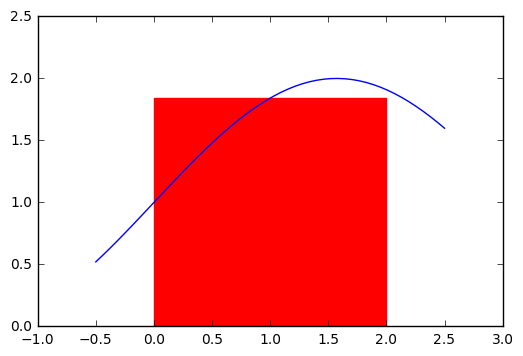

In [82]:
plt.plot(x, func(x))
plt.fill_between(x0, func(1), color='r')
plt.ylim(0, 2.5)
plt.xlim(-1, 3)

# Composite Trapezoidal

In [21]:
# Trapezoidal Method
def f(x):
    return np.sin(x)+1 #1/(1 + x**2)

In [34]:
from random import randint

# Implementing trapezoidal method
def trapezoidal(x0,xn,n):
    # calculating step size
    h = (xn - x0) / n
    
    # Finding sum 
    integration = f(x0) + f(xn)
    
    
    #plt.fill_between([x0*h, (x0+1)*h], [f(x0*h), f((x0)*h)], color='red' )
    plt.fill_between([x0*h, (x0+1)*h], [f(x0*h), f((x0+1)*h)], color='red' )
    for i in range(1,n):
        k = x0 + i*h
        integration = integration + 2 * f(k)
           
        #plt.fill_between([(i)*h, (i+1)*h], [f(i*h), f((i+0)*h)], color='#%06X' % randint(0, 0xFFFFFF))
        plt.fill_between([(i)*h, (i+1)*h], [f(i*h), f((i+1)*h)], color='#%06X' % randint(0, 0xFFFFFF))
    
    x0 = np.linspace(x0 , xn, 30)
    plt.plot(x0, f(x0))
    #plt.ylim(-1, 1.5)
    #plt.xlim(-1, 3)
    # Finding final integration value
    integration = integration * h/2
    
    return integration

Integration result by Trapezoidal method is: 3.386520


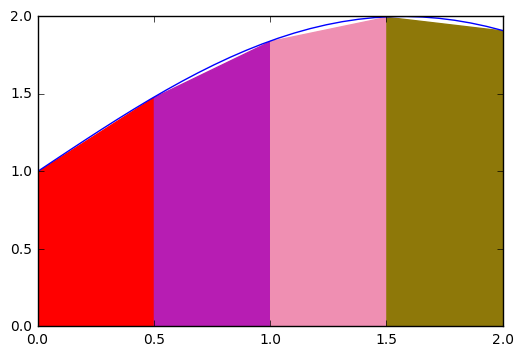

In [41]:
# Call trapezoidal() method and get result
result = trapezoidal(0, 2, 4)
print("Integration result by Trapezoidal method is: %0.6f" % (result) )

# Simpson's 

In [134]:

# Implementing Simpson's 1/3 
def simpson13(x0,xn,n):
    # calculating step size
    h = (xn - x0) / n
    
    # Finding sum 
    integration = f(x0) + f(xn)
    
    for i in range(1,n):
        k = x0 + i*h
        
        if: 
            if i%2 == 0:
                integration = integration + 2 * f(k)
            else:
                integration = integration + 4 * f(k)
        else:
            
    
    # Finding final integration value
    integration = integration * h/3
    
    return integration


In [157]:
# Call trapezoidal() method and get result
result = simpson13(0, 2, 20)
print("Integration result by Simpson's 1/3 method is: %0.6f" % (result) )

Integration result by Simpson's 1/3 method is: 2.000000


# Romberg

$R_{k,1} = \frac{1}{2} \left[R_{k-1, 1} + h_{k-1}\sum^{2^{k-2}}_{i=1} f(a+ (2i-1)h_k) \right]$

$\int^\pi_0 sinx dx $

In [4]:
def func(x):
    return np.sin(x)

In [12]:
b, a = np.pi, 0
h1 = (b-a)

In [13]:
R11 = 0.5*(b-a)*(func(a)+func(b))
R11

1.9236706937217898e-16

In [15]:
R21 = 0.5*(R11 + h1*func(a+h1/2.))
R21

1.5707963267948966

In [17]:
R31 = 0.5*(R21 + 0.5*h1*(func(a+h1/4.) + func(a+ 3*h1/4) ))
R31

1.8961188979370398

# In gral

In [162]:
def print_row(lst):
    print (' '.join('%11.8f' % x for x in lst))

def romberg(f, a, b, eps = 1E-8):
    """Approximate the definite integral of f from a to b by Romberg's method.
    eps is the desired accuracy."""
    
    # DEfine R11
    R = [[0.5 * (b - a) * (f(a) + f(b))]]  # R[0][0]
    print_row(R[0])
    n = 1
    
    while True:
        h = float(b-a)/2**n
        R.append((n+1)*[None])  # Add an empty row.
        R[n][0] = 0.5*R[n-1][0] + h*sum(f(a+(2*k-1)*h) for k in range(1, 2**(n-1)+1)) # for proper limits
        for m in range(1, n+1):
            R[n][m] = R[n][m-1] + (R[n][m-1] - R[n-1][m-1]) / (4**m - 1)
        print_row(R[n])
        if abs(R[n][n-1] - R[n][n]) < eps:
            return R[n][n]
        n += 1


In [170]:
#from math import *

romberg(lambda t: 2/sqrt(pi)*exp(-t*t), 0, 1)
#romberg(f, 0, 2)

 0.77174333
 0.82526296  0.84310283
 0.83836778  0.84273605  0.84271160
 0.84161922  0.84270304  0.84270083  0.84270066
 0.84243051  0.84270093  0.84270079  0.84270079  0.84270079


0.8427007932686705

# Gaussian Quadrature

In [33]:
c21, c22 = 0.5773, -0.5773
c31, c32, c33 = 0.774, 0, -0.774
x1, x2, x3 = 0.555, 0.888, 0.555

$\int^{1.5}_1 e^{-x^2}dx = \frac{1}{4}e^{(-(t+5)^2/16)}dt$

In [31]:
#n=2
0.25*(np.exp(-(5+c21)**2/16) + np.exp( -(5+c22)**2/16)  )

0.10939946900866954

In [34]:
#n=3 
0.25*(x1*np.exp(-(5+c31)**2/16) + x2*np.exp(-(5+c32)**2/16) + x3*np.exp(-(5+c33)**2/16)  )

0.10924794318019859

## In gral

In [6]:
from scipy.special.orthogonal import p_roots

In [10]:
def gauss1(f,n):
    [x,w] = p_roots(n+1)
    G=sum(w*f(x))
    return G

def gauss(f,n,a,b):
    #Generalized
    [x,w] = p_roots(n+1)
    G=0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

In [26]:
def my_f(x):
    #return 2*x**2 - 3*x +15 
    return 2/np.sqrt(np.pi)*np.exp(-x*x)

In [12]:
gauss1(my_f,2) 

31.33333333333333

In [28]:
gauss(my_f, 3, 0, 1.)

0.8427011713162001

https://docs.scipy.org/doc/scipy/reference/integrate.html

# ODE

In [35]:
HAcer pendulo

SyntaxError: invalid syntax (<ipython-input-35-b50c3c188b64>, line 1)